# Perceptron Implementation on the MNIST Dataset

In [102]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [103]:
mnist = load_digits()
mnist.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [104]:
digits = pd.DataFrame(mnist.data)
print(digits.head())

    0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]


In [105]:
mnist.target

array([0, 1, 2, ..., 8, 9, 8])

In [106]:
#digits_norm = (digits-digits.min().min())/(digits.max().max()-digits.min().min())

In [107]:
#Choose only two classes
class_1 = 1
class_0 = 7
selected_data = mnist.data[(mnist.target == class_1) | (mnist.target == class_0)]
selected_target = mnist.target[(mnist.target == class_1) | (mnist.target == class_0)]
selected_target1 = (selected_target == class_1).astype(int)  #convert the labels to 0 or 1

In [108]:
X_train, X_test, y_train, y_test = train_test_split(selected_data, selected_target1, test_size=0.3, random_state=42)

In [109]:
def perceptron (X, y, alpha, N):
    learning_rate = alpha   #between 0 and 1
    iterations = N    #number of iterations
    
    weights = np.zeros(X.shape[1]) 
    intercept = 0
    
    for _ in range(iterations):
        for xi, yi in zip(X,y):
            #calculate the product between the features and the weights
            z = np.dot(xi, weights) + intercept
            
            # Apply step function to get binary prediction
            if z >= 0:
                y_pred = 1
            else:
                y_pred = 0
                
            # Update weights and intercept if prediction is incorrect
            if y_pred != yi:
                weights += learning_rate * yi * xi
                intercept += learning_rate * yi
    
    return weights, intercept

In [110]:
weights, intercept = perceptron(X_train, y_train, alpha=0.001, N=1000)

# Predict classes for test data
y_pred = []
for xi in X_test:
    z = np.dot(xi, weights) + intercept
    if z >= 0:
        y_pred.append(1)
    else:
        y_pred.append(0)

# Calculate accuracy
accuracy = np.mean(np.array(y_pred) == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.5412844036697247


# Hyperparameters

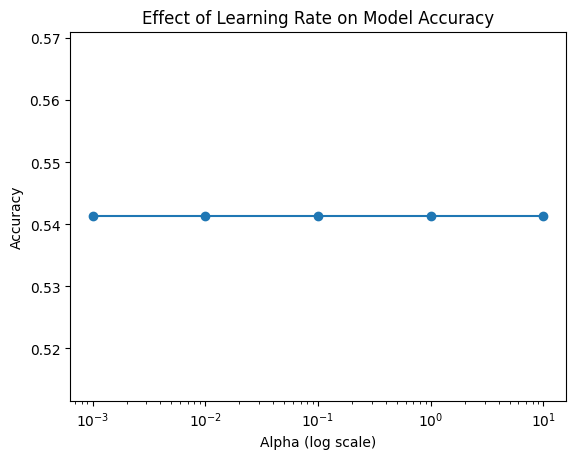

In [111]:
import matplotlib.pyplot as plt

alphas = [0.001, 0.01, 0.1, 1, 10] # lista de valores para alpha
accuracies = []

for alpha in alphas:
    weights, intercept = perceptron(X_train, y_train, alpha=alpha, N=1000)
    y_pred = []
    for xi in X_test:
        z = np.dot(xi, weights) + intercept
        if z >= 0:
            y_pred.append(1)
        else:
            y_pred.append(0)
    accuracy = np.mean(np.array(y_pred) == y_test)
    accuracies.append(accuracy)

plt.plot(alphas, accuracies, '-o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Accuracy')
plt.title('Effect of Learning Rate on Model Accuracy')
plt.show()

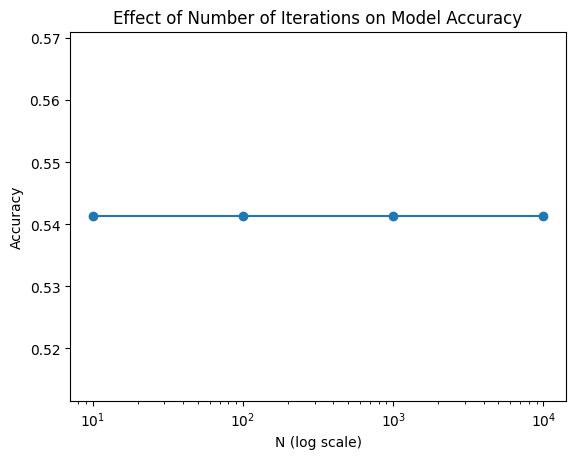

In [112]:
import matplotlib.pyplot as plt

Ns = [10, 100, 1000, 10000] # lista de valores para alpha
accuracies = []

for N in Ns:
    weights, intercept = perceptron(X_train, y_train, alpha=0.001, N=N)
    y_pred = []
    for xi in X_test:
        z = np.dot(xi, weights) + intercept
        if z >= 0:
            y_pred.append(1)
        else:
            y_pred.append(0)
    accuracy = np.mean(np.array(y_pred) == y_test)
    accuracies.append(accuracy)

plt.plot(Ns, accuracies, '-o')
plt.xscale('log')
plt.xlabel('N (log scale)')
plt.ylabel('Accuracy')
plt.title('Effect of Number of Iterations on Model Accuracy')
plt.show()